In [0]:
###############################################################################
# SETUP - EXECUTE THIS FIRST                                                  #
###############################################################################
# 1. Go into "Runtime" -> "Change runtime type" and Select "GPU" for hardward accelerator
# 2. Click the "Connect" button, at the right to start the instance.
# 3. Connect to the google drive containing the trained model
from google.colab import drive
drive.mount('/content/drive')
# Test if we have the model from train_resnet_rgb.ipynb
!ls /content/drive/'My Drive'/resnet50*
# Download some picture (note, from Google Map (c))
!wget https://github.com/nknewlands/DeepLearningShortCourse/raw/master/Day1/EuroSat_Classification/Montreal.PNG
!wget https://github.com/nknewlands/DeepLearningShortCourse/raw/master/Day1/EuroSat_Classification/Ottawa.PNG
!wget https://github.com/nknewlands/DeepLearningShortCourse/raw/master/Day1/EuroSat_Classification/Chambly.PNG

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'/content/drive/My Drive/resnet50_rgb_final.hdf5'
--2019-08-12 17:35:45--  https://github.com/nknewlands/DeepLearningShortCourse/raw/master/Day1/EuroSat_Classification/Montreal.PNG
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/nknewlands/DeepLearningShortCourse/master/Day1/EuroSat_Classification/Montreal.PNG [following]
--2019-08-12 17:35:45--  https://raw.githubusercontent.com/nknewlands/DeepLearningShortCourse/master/Day1/EuroSat_Classification/Montreal.PNG
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, 

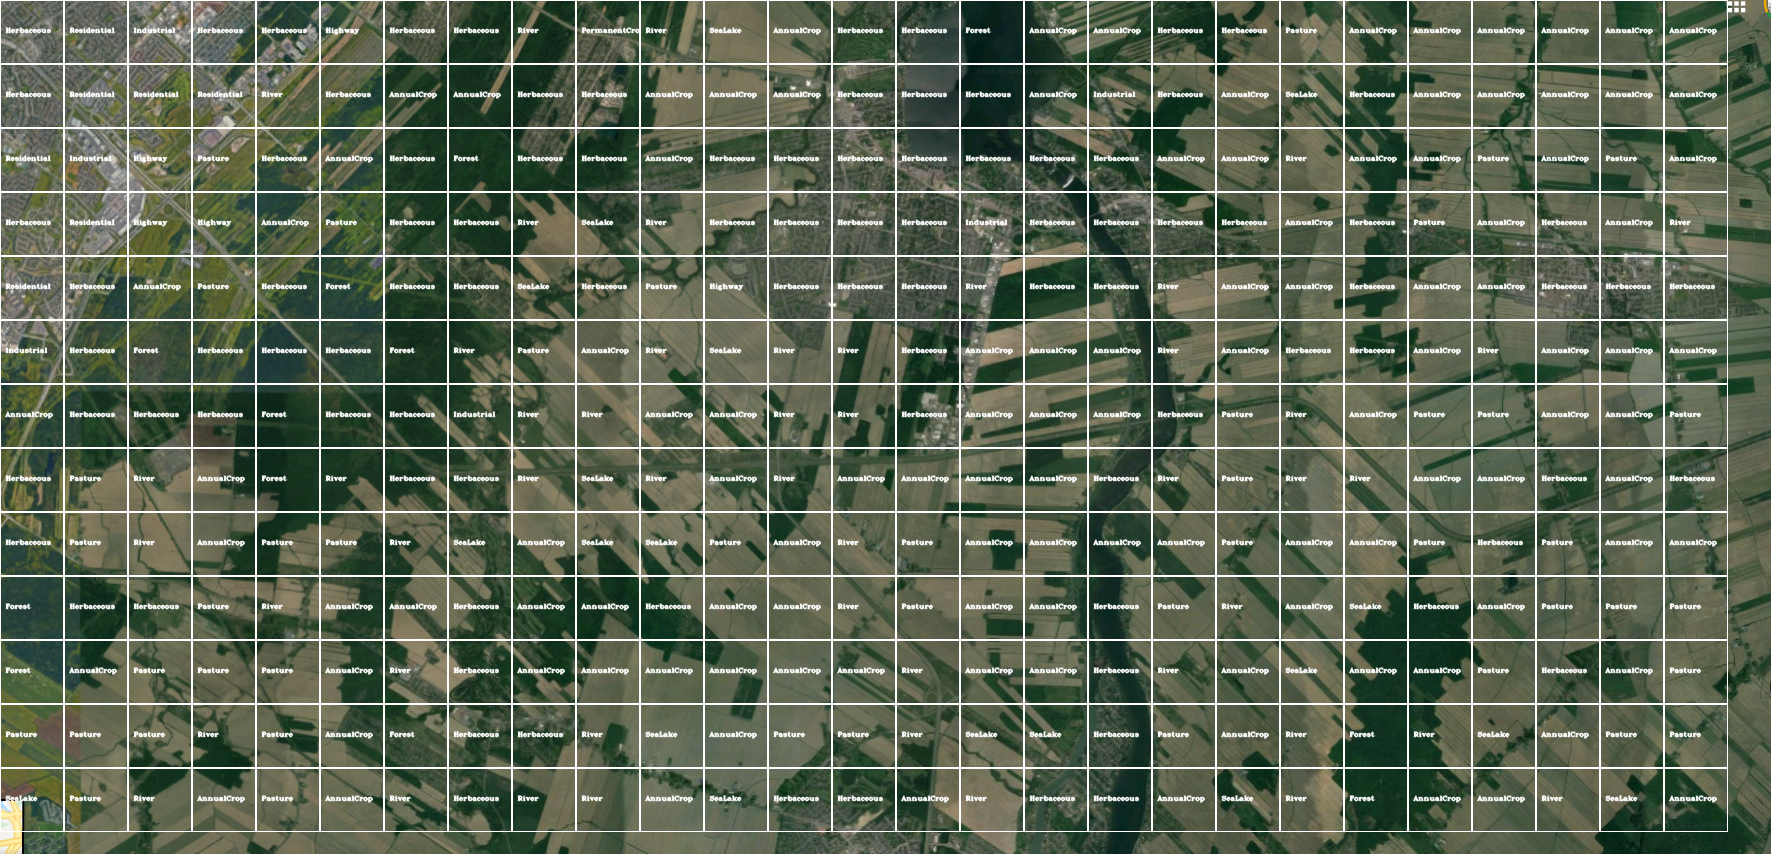

In [0]:
# ==============================================================================
# This demonstrate how load a trained model and use it to classify land use.
# Original data from https://arxiv.org/abs/1709.00029
# Etienne Lord - 2019
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from keras.layers import Activation, Dropout, Flatten, Dense,GlobalAveragePooling2D
from keras.optimizers import RMSprop
from keras.callbacks import *
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras import backend as K
from keras.models import load_model
from pathlib import Path

################################################################################ 
# LOAD PREVIOUS MODEL                                                          #
################################################################################
# Note: model will display poor accuracy because of lack of data...
model=load_model("/content/drive/My Drive/resnet50_rgb_final.hdf5")

################################################################################ 
# TEST ON ONE PICTURE  (from Google earth)                                     #
################################################################################
img1 = cv2.imread('Chambly.PNG')
x=img1.shape[0]
y=img1.shape[1]
stepx=x//64
stepy=y//64
img2=img1.copy()
# We can do better parallelism here in loading a numpy array
classes=['AnnualCrop', 'Forest', 'Herbaceous', 'Highway', 'Industrial',
         'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
for i in range(0,stepx):
    for j in range(0, stepy):
        subim=img1[i*64:(i+1)*64, j*64:(j+1)*64]         
        img_tensor = np.expand_dims(subim, axis=0)
        y_prob = model.predict(img_tensor)
        y_classes = y_prob.argmax(axis=-1)
        img2[(i)*64:(i+1)*64,j*64:(j+1)*64]=cv2.copyMakeBorder(cv2.resize(subim,(62,62)),1,1,1,1,cv2.BORDER_CONSTANT,value=[255,255,255])
        cv2.putText(img2,str(classes[y_classes[0]]),((j*64)+5,(i*64)+32), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.33, (255, 255, 255), 1, cv2.LINE_AA)
cv2_imshow(img2)
################################################################################ 
# TO DO                                                                        #
################################################################################
#
# 1. Since the training was done on only a small portion of the original data, 
#    longer training and more data is needed for any good classification.
# 2. No data augmentation nor normalization was apply. Those steps will 
#    greatly help this model.
# 3. Scale of the picture is important. This would need to be taken into account
#   in the training stage. Other models type (Feature Pyramid Network, RCNN, etc.) 
#   could handle the different scales
#
# 4. Some better examples can be found in the sample_data folder.
